<a href="https://colab.research.google.com/github/FelipePRosa/Data-Science-Projects/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ATENÇÃO: STORYTELLING EM CONSTRUÇÃO!!!!!
# Churn Prediction
<left><img alt="Analisando Airbnb" width="40%" src="https://as1.ftcdn.net/jpg/03/03/10/92/500_F_303109277_D6z8RBW2rxlnG5K1EYvpPlprgpu9Q7QU.jpg"></left>

*by [Felipe Rosa](https://www.linkedin.com/in/felipe-pimentel-rosa-19975b10b/)*<br>
*Blog: [Medium](https://medium.com/@felipepimentelrosa)*

---
<br>

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://t3.ftcdn.net/jpg/02/77/48/32/240_F_277483245_6xvCskKrwY5WEKAZ70uWhD758ia1VukS.jpg" width="60%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais baixo que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

Alguns dos motivos que podem motivar seu cliente a cancelar, com base na nossa experiência,  podem ser:

1. O cliente está sem fluxo de caixa e não pode mais arcar com a mensalidade do seu produto/serviço;
2. Ele não consegue ver valor no produto/serviço;
3. O cliente não teve suas expectativas atendidas;
4. O produto ou serviço não acompanha as evoluções de mercado e perde em qualidade e ferramentas;
5. O produto é bom, mas o serviço não – e vice versa;
6. Seu cliente optou pelo produto da concorrência;
7. Seu cliente foi adquirido por outra empresa e o comprador usa outro serviço;
8. Crise financeira no mercado;
9. Interrupção da operação durante um período de crise;
10. O cliente faliu.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [91]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import simplefilter
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
simplefilter(action='ignore', category=FutureWarning)
import warnings


# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
# Analisar as últimas 5 entradas
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [40]:
# Tamanho do dataset
print('Número de entradas: ', df.shape[0])
print('Número de varuáveis: ', df.shape[1])

Número de entradas:  7043
Número de varuáveis:  21


In [41]:
# informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Podemos já visualizar algumas informações importantes a respeitos das variáveis:
* `CostumerID` contém o registro individual para cada cliente, logo, não é uma variável importante para análise
* `TotalCharges` está formatado como uma string, terá de ser convertido para valor numérico

In [42]:
def to_int(input):
  try:
    return float(input)
  except ValueError:
    return np.nan

A seguir, iremos converter os valores de `TotalCharge` para variáveis do tipo float e substituir os valores marcados como nulos para os valores da mediana

In [43]:
df_clean = df.copy()
df_clean.TotalCharges = pd.to_numeric(df_clean.TotalCharges, errors='coerce')
# df_clean.TotalCharges = df_clean.TotalCharges.astype('float64')
# df_clean['TotalCharges'] = df_clean['TotalCharges'].apply(to_int)
df_clean.TotalCharges.fillna(df_clean.TotalCharges.median(), inplace=True)

Ao tentar realizar a conversão dos valores de forma direta, um erro ocorre. Isso acontece porque alguns valores da base de dados estavam representados como strings vazias, impossibilitando o uso do `astype`.

Para isso aplicamos o comando em Pandas `to_numeric` que retorna valores nulos (NaN) no lugar dessas strings. E depois substituindo os valores nulos pela mediana como citado.

Feito isso, podemos verificar que não há mais valores nulos

In [44]:
df_clean.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [46]:
df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,2338-BQEZT,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [47]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [48]:
# Visualização das variáveis categóricas
for series in df.drop(['customerID','tenure','MonthlyCharges','TotalCharges'], axis=1):
  print(series,':',df[series].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [49]:
for series in df[['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']]:
  print(series,':\n',df[series].value_counts(), '\n')

MultipleLines :
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService :
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity :
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup :
 No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

DeviceProtection :
 No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

TechSupport :
 No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64 

StreamingTV :
 No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64 

StreamingMovies :
 No                     2785
Yes                    27

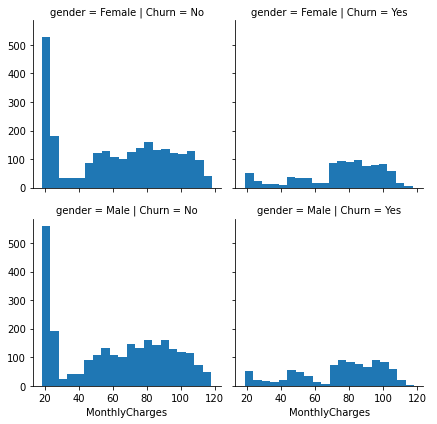

In [50]:
g = sns.FacetGrid(df, row='gender', col='Churn')
g.map(plt.hist, 'MonthlyCharges', bins=20)
g.add_legend()

In [51]:
df['Churn'] = df.Churn.map({'Yes':1, 'No':0}, na_action='ignore')
df['Partner'] = df.Partner.map({'Yes':1, 'No':0}, na_action='ignore')
df['Dependents'] = df.Dependents.map({'Yes':1, 'No':0}, na_action='ignore')
df['PhoneService'] = df.PhoneService.map({'Yes':1, 'No':0},na_action='ignore')
df['PaperlessBilling'] = df.PaperlessBilling.map({'Yes':1, 'No':0}, na_action='ignore')
df['gender'] = df.gender.map({'Male':1, 'Female':0}, na_action='ignore')

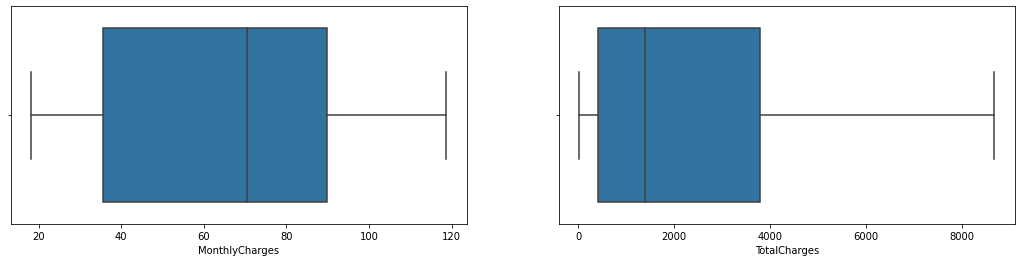

In [52]:
fg, ax = plt.subplots(1,2,figsize=(18,4))
ax[0] = sns.boxplot(df_clean['MonthlyCharges'], ax=ax[0])
ax[1] = sns.boxplot(df_clean['TotalCharges'], ax=ax[1])
plt.show()

In [53]:
df[['gender','Churn']].groupby('gender').mean()

,Churn
gender,
0,0.269209
1,0.261603


In [54]:
df[['Partner','Churn']].groupby('Partner').mean()

,Churn
Partner,
0,0.329580
1,0.196649


In [55]:
df[['Dependents','Churn']].groupby('Dependents').mean()

,Churn
Dependents,
0,0.312791
1,0.154502


In [56]:
df[['PhoneService','Churn']].groupby('PhoneService').mean()

,Churn
PhoneService,
0,0.249267
1,0.267096


In [57]:
df[['PaperlessBilling','Churn']].groupby('PaperlessBilling').mean()

,Churn
PaperlessBilling,
0,0.163301
1,0.335651


25.04424778761062
24.926686217008797


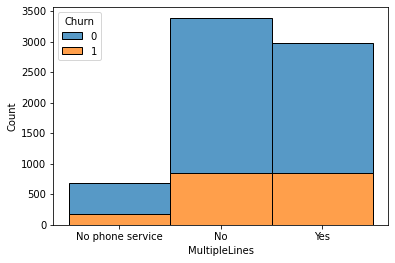

In [58]:
# df.MultipleLines.value_counts().plot(kind='bar')
sns.histplot(df, x='MultipleLines', hue='Churn', multiple='stack')
print(df[df.MultipleLines == "No"]['Churn'].sum()/df[df.MultipleLines == "No"].shape[0]*100)
print(df[df.MultipleLines == "No phone service"]['Churn'].sum()/df[df.MultipleLines == "No phone service"].shape[0]*100)

41.76672384219554
7.404980340760157


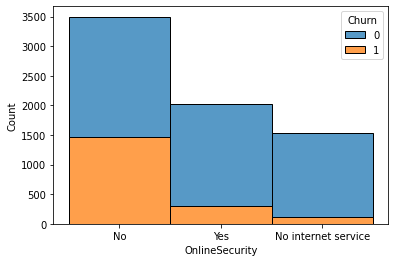

In [59]:
# df.OnlineSecurity.value_counts().plot(kind='bar')
sns.histplot(df,x='OnlineSecurity', hue='Churn', multiple='stack')
print(df[df.OnlineSecurity == "No"]['Churn'].sum()/df[df.OnlineSecurity == "No"].shape[0]*100)
print(df[df.OnlineSecurity == "No internet service"]['Churn'].sum()/df[df.OnlineSecurity == "No internet service"].shape[0]*100)

39.127625201938606
7.404980340760157


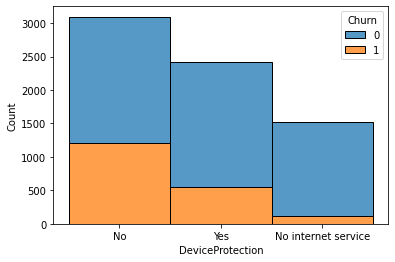

In [60]:
# df.DeviceProtection.value_counts().plot(kind='bar')
sns.histplot(df,x='DeviceProtection', hue='Churn', multiple='stack')
print(df[df.DeviceProtection == "No"]['Churn'].sum()/df[df.DeviceProtection == "No"].shape[0]*100)
print(df[df.DeviceProtection == "No internet service"]['Churn'].sum()/df[df.DeviceProtection == "No internet service"].shape[0]*100)

In [61]:
df[['MultipleLines','Churn']].groupby('MultipleLines').mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


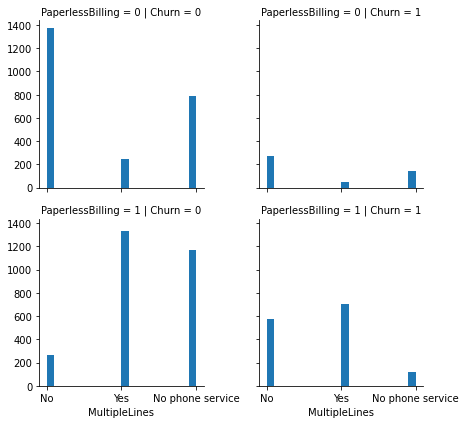

In [62]:
g = sns.FacetGrid(df, row='PaperlessBilling', col='Churn')
g.map(plt.hist, 'MultipleLines', bins=20)
g.add_legend()

In [63]:
for i in range(2):
  for j in range(2):
    df_Nos = df[(df.PaperlessBilling == i) & (df.Churn == j)].MultipleLines.value_counts()[0]
    df_Nop = df[(df.PaperlessBilling == i) & (df.Churn == j)].MultipleLines.value_counts()[2]
    df_Tot = df[(df.PaperlessBilling == i) & (df.Churn == j)].MultipleLines.value_counts().sum()
    print('PaperlessBilling:', i, 'Churn:', j, 'resultam em "No" em', round(df_Nos/df_Tot*100, 2), '% dos valores')
    print('PaperlessBilling:', i, 'Churn:', j, 'resultam em "No phone service" em', round(df_Nop/df_Tot*100, 2), '% dos valores')
    print('')

PaperlessBilling: 0 Churn: 0 resultam em "No" em 57.05 % dos valores
PaperlessBilling: 0 Churn: 0 resultam em "No phone service" em 10.11 % dos valores

PaperlessBilling: 0 Churn: 1 resultam em "No" em 58.42 % dos valores
PaperlessBilling: 0 Churn: 1 resultam em "No phone service" em 11.09 % dos valores

PaperlessBilling: 1 Churn: 0 resultam em "No" em 48.07 % dos valores
PaperlessBilling: 1 Churn: 0 resultam em "No phone service" em 9.71 % dos valores

PaperlessBilling: 1 Churn: 1 resultam em "No" em 50.5 % dos valores
PaperlessBilling: 1 Churn: 1 resultam em "No phone service" em 8.43 % dos valores



In [64]:
lst = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

In [65]:
df = df.join(pd.get_dummies(df[lst])).drop(lst, axis=1)
df.drop('customerID', axis=1, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.5,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.9,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.6,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [66]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                

In [67]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges.fillna(df.TotalCharges.median(), inplace=True)

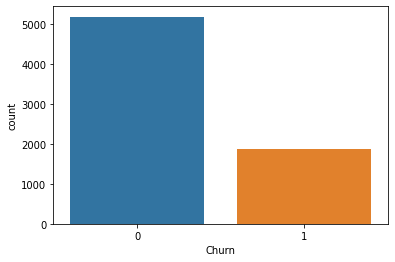

In [68]:
sns.countplot(df.Churn)

In [69]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [70]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

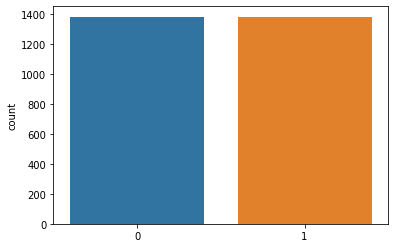

In [71]:
sns.countplot(y_rus)

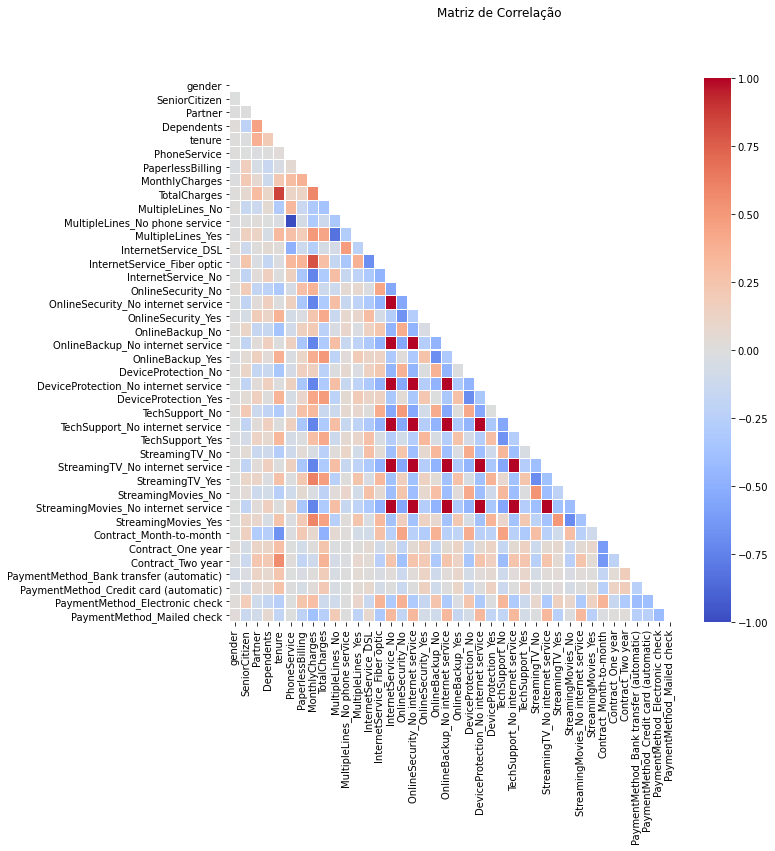

In [72]:
corr = X.corr()
corr_rus = pd.DataFrame(X_rus).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
map = sns.diverging_palette(230, 20, as_cmap=True)

fig, ax = plt.subplots(figsize = (10,10))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns, mask=mask,
            linewidths=.1, cmap="coolwarm", ax=ax)

plt.show()

In [73]:
# Geração de modelo dos 5 métodos aplicados acima
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

In [87]:
# instanciar modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
lsvc = LinearSVC()

model = []
recall = []
accs = []
# avaliar o desempenho
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm, knn, rfc, lsvc):
    model.append(clf.__class__.__name__)
    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X_rus, y_rus, scoring='recall')
    value = scores.mean()
    recall.append(value)

pd.DataFrame(data=recall, index=model, columns=['Recall'])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

,Recall
RandomForestClassifier,0.773654
DecisionTreeClassifier,0.700625
SGDClassifier,0.733783
SVC,0.807641
LogisticRegression,0.811971
XGBClassifier,0.821386
LGBMClassifier,0.799681
KNeighborsClassifier,0.813407
RandomForestClassifier,0.777991
LinearSVC,0.819217


In [ ]:
xgb = XGBClassifier()

param_grid = {
 'n_estimators':range(0,1000,50),
 'max_depth':range(1,8,1),
 'min_child_weight':range(1,5,1),
 'gamma':[i/10.0 for i in range(0,5)],
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus, y_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))